In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import decomposition

import pandas as pd
from pandas import  DataFrame, Series

In [3]:
X,y = make_classification(n_samples=100, n_features=10, n_informative=3, random_state=0)

In [4]:
clf = LogisticRegression()
clf.fit(X, y)
selector = RFE(clf, n_features_to_select=3)
selector = selector.fit(X, y)
print(selector.support_)
print selector.ranking_

[False  True False  True  True False False False False False]
[7 1 4 1 1 3 2 8 6 5]


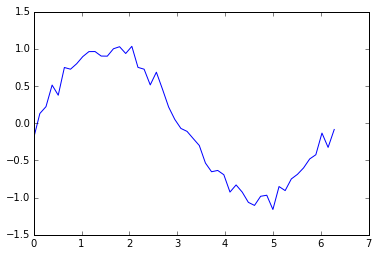

In [5]:
x = np.linspace(0,2*pi,50)
y = np.sin(x)+np.random.randn(x.shape[0])*.1
plot(x,y)

In [6]:
X=np.hstack([np.c_[y], np.c_[2*y],np.c_[3*y]])
pca=decomposition.PCA(X,2)

In [7]:
t=(np.sqrt(i)*np.sin(x)+np.random.randn(x.shape[0])*.1 for i in range(1,5))
X = np.vstack(t).T

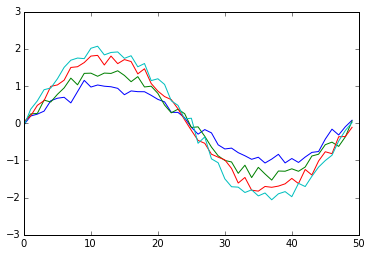

In [8]:
plot(X);

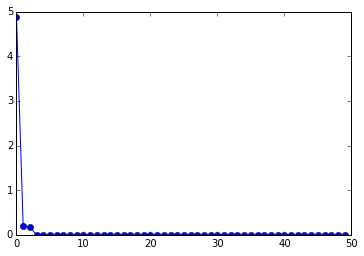

In [9]:
u,s,v=np.linalg.svd(np.cov(X))
plot(np.round(s,6),'o-')

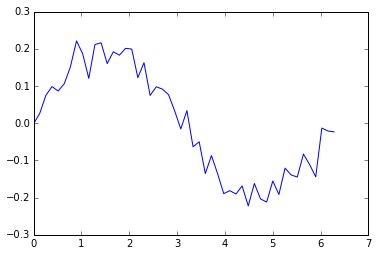

In [10]:
plot(x,u[:,0])

In [11]:
pca = decomposition.PCA()

[  1.00000000e+00   5.32768572e-33   2.73063694e-34]


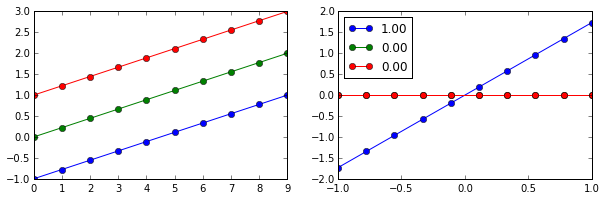

In [12]:
x = linspace(-1,1,10)
fig,axs=subplots(1,2)
fig.set_size_inches((10,3))
X = np.c_[x,x+1,x+2]
axs[0].plot(X,'-o');
pca.fit(X)
print pca.explained_variance_ratio_
axs[1].plot(x,pca.fit_transform(X),'-o')
axs[1].legend(['%3.2f'%i for i in pca.explained_variance_ratio_],loc=0)

[  1.00000000e+00   5.50599366e-34   1.64335889e-34]


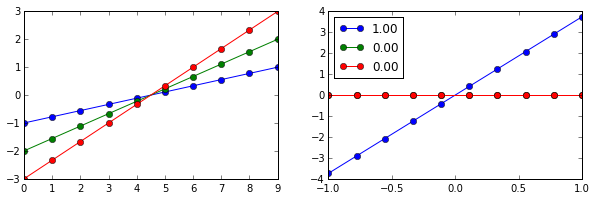

In [13]:
fig,axs=subplots(1,2)
fig.set_size_inches((10,3))
X = np.c_[x,2*x,3*x]
axs[0].plot(X,'-o');
pca.fit(X)
print pca.explained_variance_ratio_
axs[1].plot(x,pca.fit_transform(X),'-o')
axs[1].legend(['%3.2f'%i for i in pca.explained_variance_ratio_],loc=0)

[  1.00000000e+00   1.28509837e-32   1.73564577e-34]


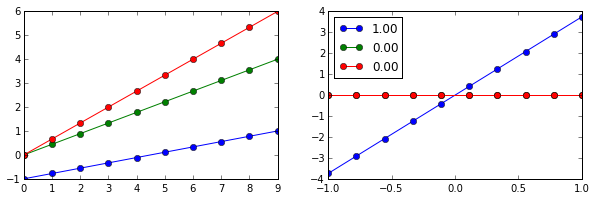

In [14]:
fig,axs=subplots(1,2)
fig.set_size_inches((10,3))
X = np.c_[x,2*x+2,3*x+3]
axs[0].plot(X,'-o');
pca.fit(X)
print pca.explained_variance_ratio_
axs[1].plot(x,pca.fit_transform(X),'-o')
axs[1].legend(['%3.2f'%i for i in pca.explained_variance_ratio_],loc=0)

[  1.00000000e+00   1.38554767e-32   1.06476530e-33]


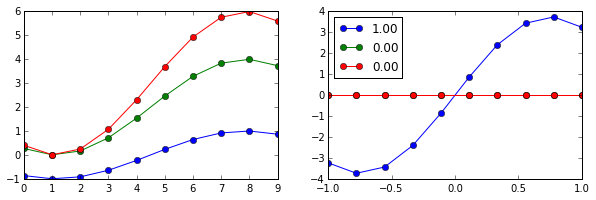

In [15]:
fig,axs=subplots(1,2)
fig.set_size_inches((10,3))
X = np.c_[np.sin(2*pi/3*x),2*np.sin(2*pi/3*x)+2,3*np.sin(2*pi/3*x)+3]
axs[0].plot(X,'-o');
pca.fit(X)
print pca.explained_variance_ratio_
axs[1].plot(x,pca.fit_transform(X),'-o')
axs[1].legend(['%3.2f'%i for i in pca.explained_variance_ratio_],loc=0)

[  8.38204130e-01   1.61795870e-01   3.49087825e-33]


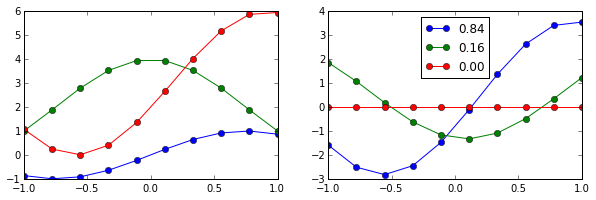

In [16]:
fig,axs=subplots(1,2)
fig.set_size_inches((10,3))
X = np.c_[np.sin(2*pi/3*x),2*np.cos(2*pi/3*x)+2,3*np.sin(2*pi/3*(x-0.166))+3]
axs[0].plot(x,X,'-o');
pca.fit(X)
print pca.explained_variance_ratio_
axs[1].plot(x,pca.fit_transform(X),'-o')
axs[1].legend(['%3.2f'%i for i in pca.explained_variance_ratio_],loc=0)


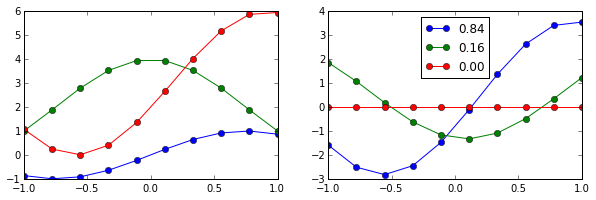

In [17]:
fig

D:\Miniconda64\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<matplotlib.contour.QuadContourSet instance at 0x0000000020432348>

D:\Miniconda64\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


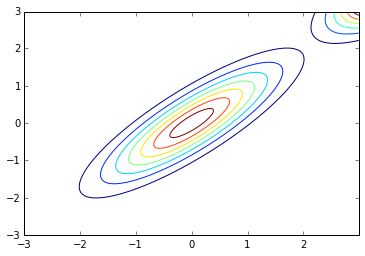

In [18]:
import scipy.stats
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv=scipy.stats.multivariate_normal(cov = np.array([[1,.85],[.85,1]]))
rv1=scipy.stats.multivariate_normal(mean=[5,5],cov = np.array([[1,.85],[.85,1]]))

fig,ax = subplots()
ax.contour(x,y,rv.pdf(pos),cm=cm.cool)
ax.contour(x,y,rv1.pdf(pos),cm=cm.cool)

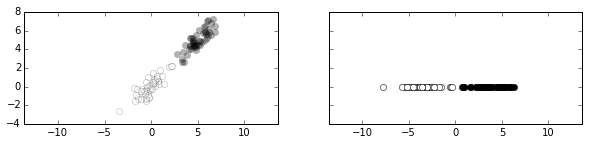

In [19]:
fig,axs = subplots(1,2,sharex=True,sharey=True)
fig.set_size_inches((10,2))
ax=axs[0]

x,y=rv.rvs(50).T
ax.plot(x,y,'ow',alpha=.3)
x1,y1=rv1.rvs(50).T
ax.plot(x1,y1,'ok',alpha=.3)
ax.set_aspect(1)

X=np.c_[np.r_[x,x1],np.r_[y,y1]]
pca.fit(X)
Xx=pca.fit_transform(X)

ax=axs[1]
x,y=Xx[:50,:].T
ax.plot(x,y*0,'wo')
x1,y1=Xx[50:,:].T
ax.plot(x1,y1*0,'ko')

[ 0.97056094  0.02943906]


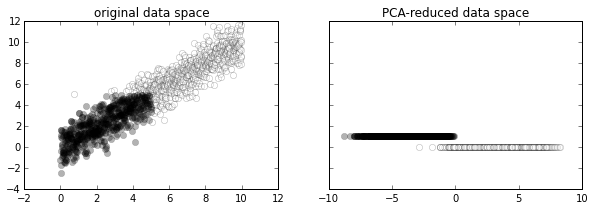

In [20]:
fig,axs=subplots(1,2,sharey=True)
fig.set_size_inches((10,3))
ax=axs[0]
ax.axis(xmin=-2,xmax=12)
x1 = np.arange(0, 10, .01/1.2)
x2 = x1+np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = (x1>5) | (x2>5) 
bad = ~good
ax.plot(x1[good],x2[good],'ow',alpha=.3)
ax.plot(x1[bad],x2[bad],'ok',alpha=.3)
ax.set_title("original data space")

pca.fit(X)
Xx=pca.fit_transform(X)
ax=axs[1]
ax.plot(Xx[good,0],Xx[good,1]*0,'ow',alpha=.3)
ax.plot(Xx[bad,0],Xx[bad,1]*0+1,'ok',alpha=.3)
ax.set_title("PCA-reduced data space")
print pca.explained_variance_ratio_

[ 0.97358938  0.02641062]


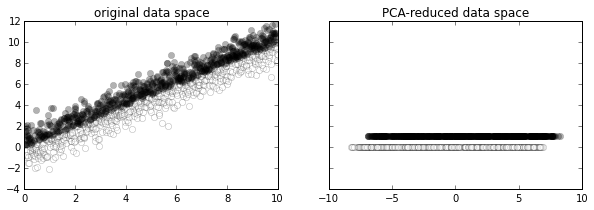

In [21]:
fig,axs=subplots(1,2,sharey=True)
fig.set_size_inches((10,3))
ax=axs[0]
x1 = np.arange(0, 10, .01/1.2)
x2 = x1+np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = x1>x2
bad = ~good 
ax.plot(x1[good],x2[good],'ow',alpha=.3)
ax.plot(x1[bad],x2[bad],'ok',alpha=.3)
ax.set_title("original data space")

pca.fit(X)
Xx=pca.fit_transform(X)
ax=axs[1]
ax.plot(Xx[good,0],Xx[good,1]*0,'ow',alpha=.3)
ax.plot(Xx[bad,0],Xx[bad,1]*0+1,'ok',alpha=.3)
ax.set_title("PCA-reduced data space")
print pca.explained_variance_ratio_

## ICA vs. PCA example (p. 562 elements of statistical learning)

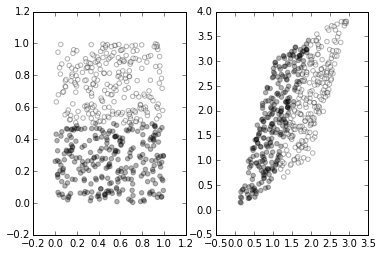

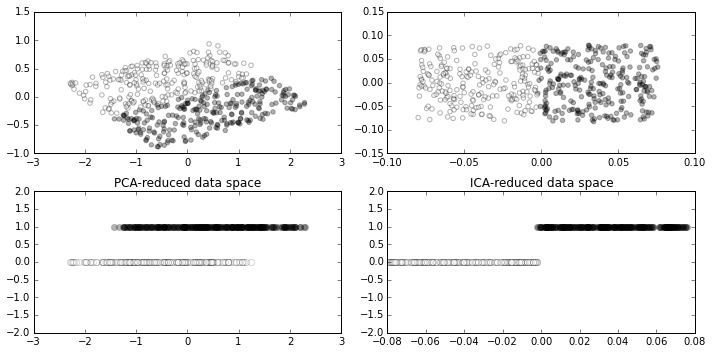

In [22]:
from sklearn.decomposition import FastICA

u,v = np.random.rand(2,500)
S=np.c_[u,v]
good = (v>0.5)
colors = map(lambda i:'w' if i else 'k',good)

ica = FastICA()
pca = decomposition.PCA(whiten=False)

A = np.matrix([[1,2],
              [3,1]])
xu,xv=(S*A.T).T
X = np.c_[xu.flat,xv.flat]

fig,axs=subplots(1,2)

ax=axs[0]
ax.scatter(u,v,alpha=.3,c=colors)

ax=axs[1]
ax.scatter(xu,xv,alpha=.3,c=colors)

fig,axs=subplots(2,2)
fig.set_size_inches((10,5))

pca.fit(X)
Xx=pca.fit_transform(X)
ax = axs[0,0]
ax.scatter(Xx[:,0],Xx[:,1],alpha=.3,c=colors)
# ax.set_aspect(1)

ax=axs[1,0]
ax.axis(ymax=2,ymin=-2)
ax.plot(Xx[good,0],Xx[good,1]*0,'ow',alpha=.3)
ax.plot(Xx[~good,0],Xx[~good,1]*0+1,'ok',alpha=.3)
ax.set_title("PCA-reduced data space")

ax=axs[0,1]
ica.fit(X)
Xx=ica.fit_transform(X)
ax.scatter(Xx[:,0],Xx[:,1],alpha=.3,c=colors)

ax=axs[1,1]
ax.axis(ymax=2,ymin=-2)
ax.plot(Xx[good,0],Xx[good,1]*0,'ow',alpha=.3)
ax.plot(Xx[~good,0],Xx[~good,1]*0+1,'ok',alpha=.3)
ax.set_title("ICA-reduced data space")
fig.tight_layout()

## ICA signal inversion example

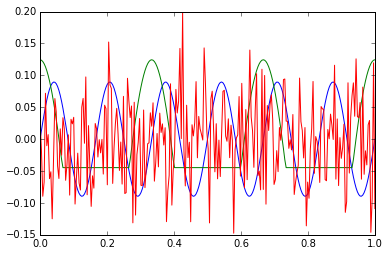

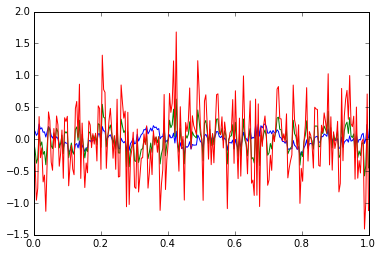

In [23]:
np.random.seed(123456)
t = np.linspace(0,1,250)
s1 = sin(2*pi*t*6)
s2 =np.maximum(cos(2*pi*t*3),0.3)
s2 = s2 - s2.mean()
s3 = np.random.randn(len(t))*.1

s1=s1/np.linalg.norm(s1)
s2=s2/np.linalg.norm(s2)
s3=s3/np.linalg.norm(s3)

plot(t,c_[s1,s2,s3])
A = matrix([[1,1,1],
            [0.5,-1,3],
            [.1,-2,8]])
# A = matrix(np.eye(3))
fig,ax=subplots()
ax.plot(t,(c_[s1,s2,s3]*A.T))
X= (c_[s1,s2,s3]*A.T)

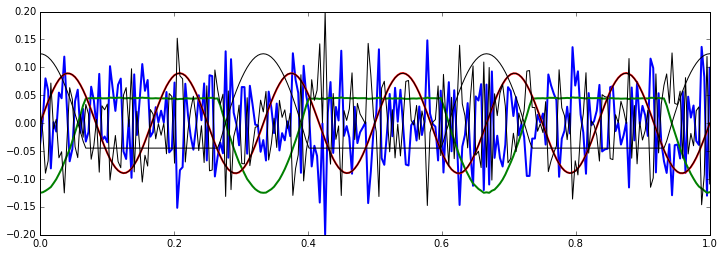

In [24]:
fig,ax=subplots()
fig.set_size_inches((12,4))
Xx = ica.fit_transform(X)
ax.plot(t,Xx,lw=2)
ax.plot(t,c_[s1,s2,s3],color='k')

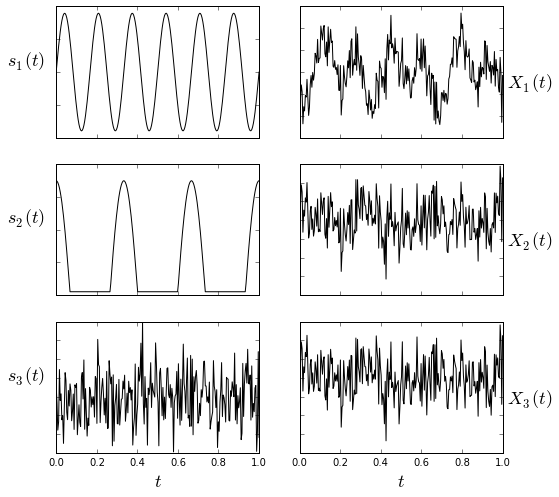

In [25]:
fig,axs=subplots(3,2,sharex=True)
fig.set_size_inches((8,8))
axs[0,1].plot(t,-X[:,0],'k-')
axs[1,1].plot(t,-X[:,1],'k-')
axs[2,1].plot(t,-X[:,2],'k-')
axs[0,0].plot(t,s1,'k-')
axs[1,0].plot(t,s2,'k-')
axs[2,0].plot(t,s3,'k-')

axs[2,0].set_xlabel('$t$',fontsize=18)
axs[2,1].set_xlabel('$t$',fontsize=18)
axs[0,0].set_ylabel('$s_1(t)$'+' '*8,fontsize=18,rotation='horizontal')
axs[1,0].set_ylabel('$s_2(t)$'+' '*8,fontsize=18,rotation='horizontal')
axs[2,0].set_ylabel('$s_3(t)$'+' '*8,fontsize=18,rotation='horizontal')
for ax in axs.flatten():
    ax.yaxis.set_ticklabels('')

axs[0,1].set_ylabel(' '*8+'$X_1(t)$',fontsize=18,rotation='horizontal')
axs[0,1].yaxis.set_label_position("right")
axs[1,1].set_ylabel(' '*8+'$X_2(t)$',fontsize=18,rotation='horizontal')
axs[1,1].yaxis.set_label_position("right")
axs[2,1].set_ylabel(' '*8+'$X_3(t)$',fontsize=18,rotation='horizontal')
axs[2,1].yaxis.set_label_position("right")

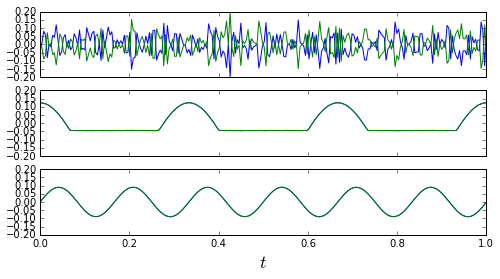

In [26]:
fig,axs=subplots(3,1,sharex=True,sharey=True)
fig.set_size_inches((8,4))
axs[0].plot(t,Xx[:,0],t,s3)
axs[1].plot(t,-Xx[:,1],t,s2)
axs[2].plot(t,Xx[:,2],t,s1)
axs[2].set_xlabel('$t$',fontsize=18)

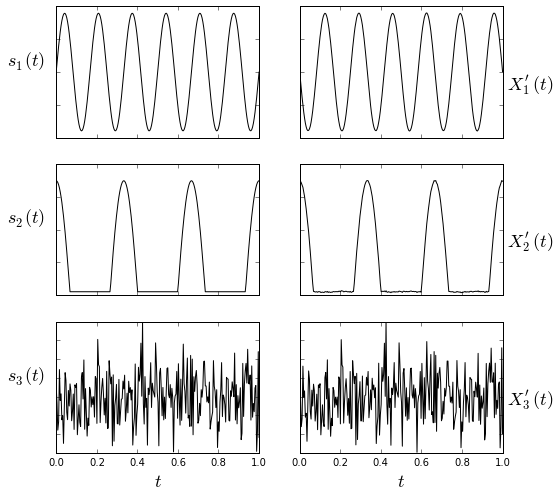

In [27]:
fig,axs=subplots(3,2,sharex=True)
fig.set_size_inches((8,8))
Xx = np.array(Xx)

_=axs[0,1].plot(t,-Xx[:,2],'k-')
_=axs[1,1].plot(t,-Xx[:,1],'k-')
_=axs[2,1].plot(t,-Xx[:,0],'k-')
_=axs[0,0].plot(t,s1,'k-')
_=axs[1,0].plot(t,s2,'k-')
_=axs[2,0].plot(t,s3,'k-')

_=axs[2,0].set_xlabel('$t$',fontsize=18)
_=axs[2,1].set_xlabel('$t$',fontsize=18)
_=axs[0,0].set_ylabel('$s_1(t)$        ',fontsize=18,rotation='horizontal')
_=axs[1,0].set_ylabel('$s_2(t)$        ',fontsize=18,rotation='horizontal')
_=axs[2,0].set_ylabel('$s_3(t)$        ',fontsize=18,rotation='horizontal')
for ax in axs.flatten():
    _=ax.yaxis.set_ticklabels('')

_=axs[0,1].set_ylabel('        $X_1^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[1,1].set_ylabel('        $X_2^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[2,1].set_ylabel('        $X_3^\prime(t)$',fontsize=18,rotation='horizontal')
_=axs[0,1].yaxis.set_label_position("right")
_=axs[1,1].yaxis.set_label_position("right")
_=axs[2,1].yaxis.set_label_position("right")
